In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [23]:
dataset=pd.read_csv(r"C:\Users\sauhard\Downloads\Complete-Deep-Learning-master\Complete-Deep-Learning-master\ANN\Churn_Modelling.csv")

In [24]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [25]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [26]:
X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)



In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
import keras

Using TensorFlow backend.


In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [31]:
classifier=Sequential()

In [32]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))


classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))


classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))


In [33]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [34]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,nb_epoch=100)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
1620/5359 [========>.....................] - ETA: 0s - loss: 0.3472 - acc: 0.8568

C:\Users\sauhard\Anaconda3\envs\tensorenv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


5359/5359 [==============================] - 1s 109us/step - loss: 0.3286 - acc: 0.8647 - val_loss: 0.3501 - val_acc: 0.8599
Epoch 2/100
5359/5359 [==============================] - 1s 96us/step - loss: 0.3285 - acc: 0.8666 - val_loss: 0.3503 - val_acc: 0.8591

dict_keys(['loss', 'val_acc', 'acc', 'val_loss'])


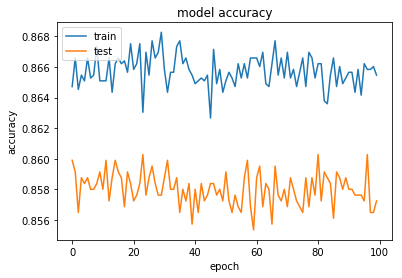

In [37]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

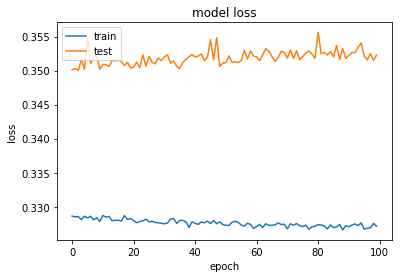

In [38]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [42]:
score

0.85799999999999998

In [43]:
cm

array([[1491,  104],
       [ 180,  225]], dtype=int64)